In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [11]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
X.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [13]:
housing = pd.concat([X, y], axis=1)
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


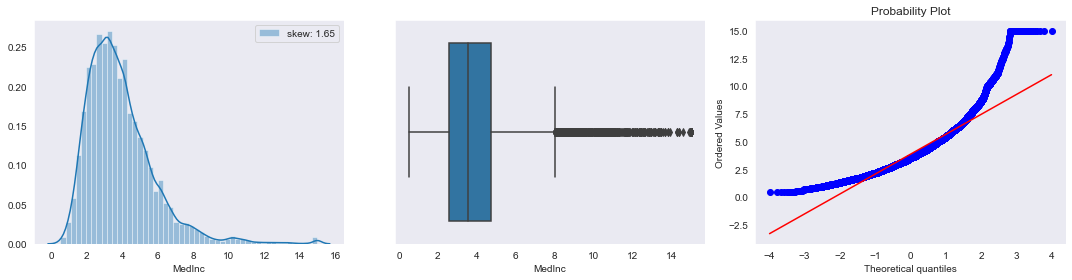

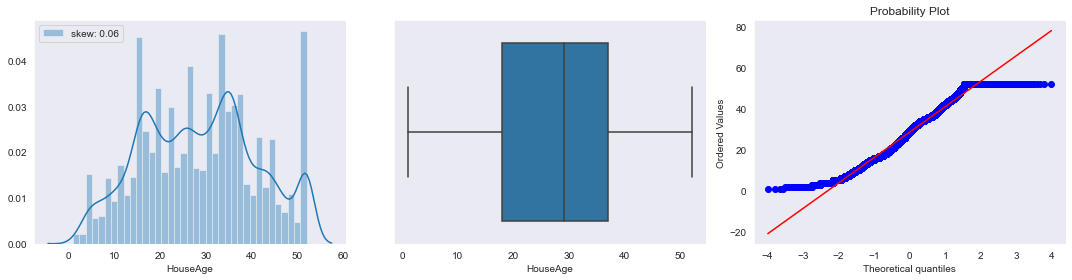

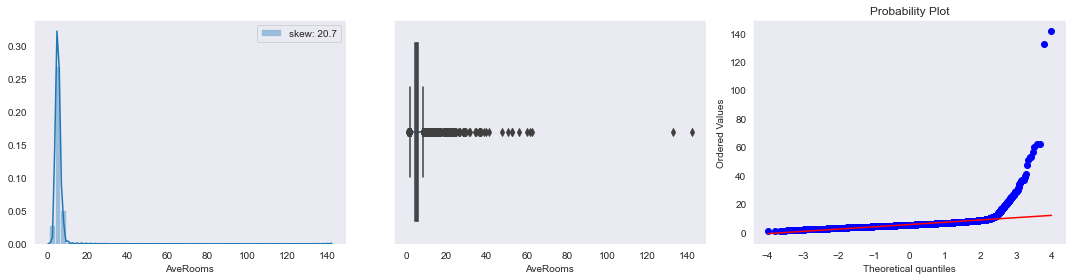

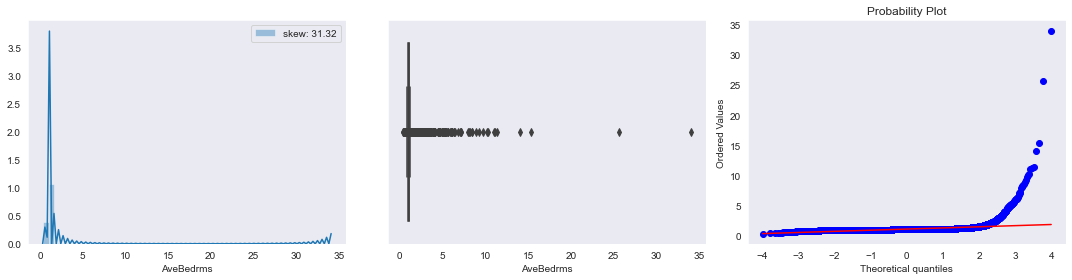

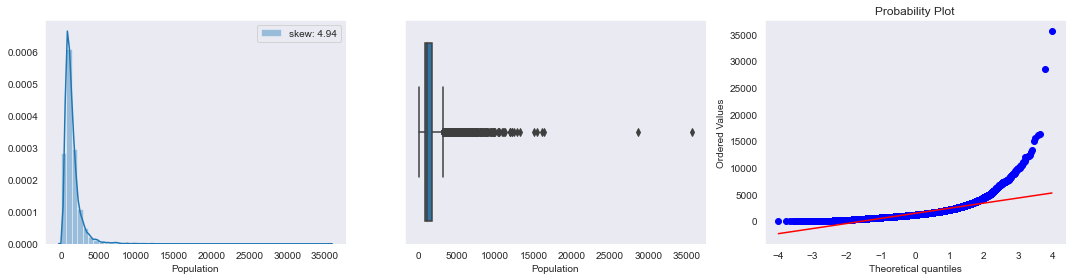

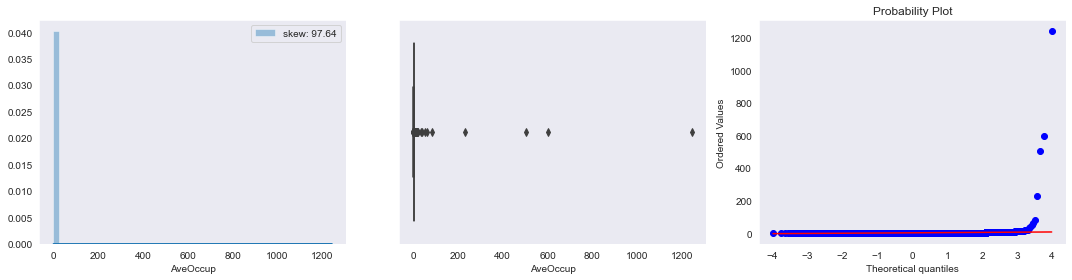

In [21]:
for col in X.columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(131)
    sns.distplot(housing[col], label="skew: "+str(np.round(housing[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(housing[col])
    plt.subplot(133)
    stats.probplot(housing[col], plot=plt)
    plt.tight_layout()
    plt.show()

### IQR capping

In [15]:
df_cap = housing.copy()

In [18]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                  np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [19]:
iqr_capping(df_cap, X.columns, 1.5)

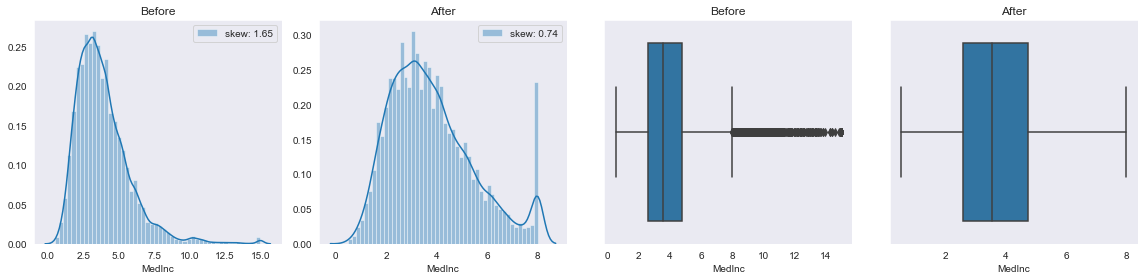

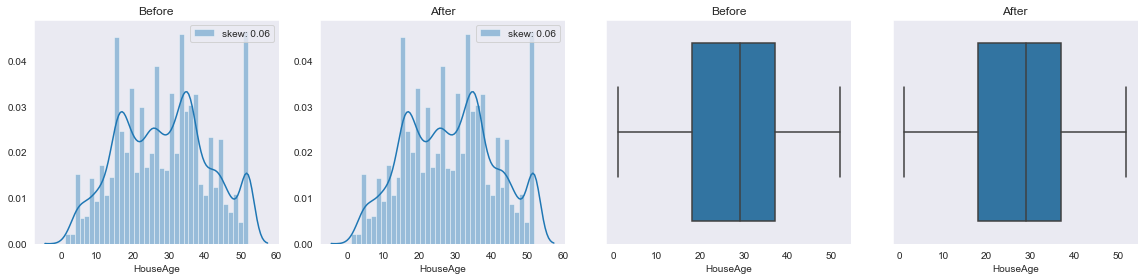

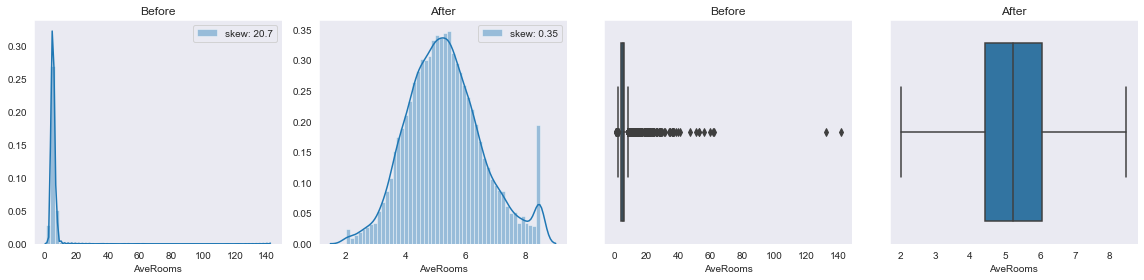

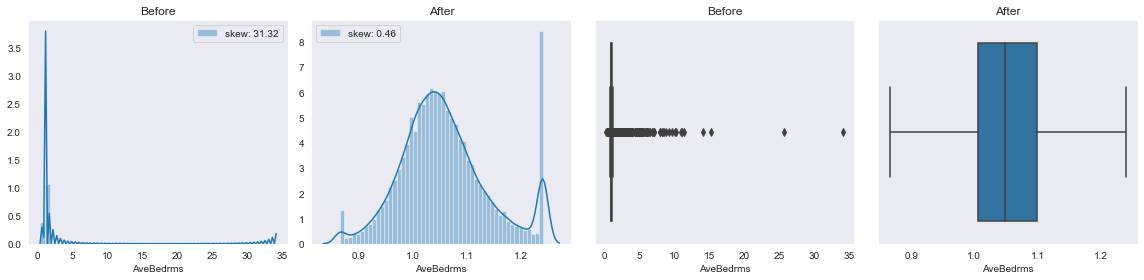

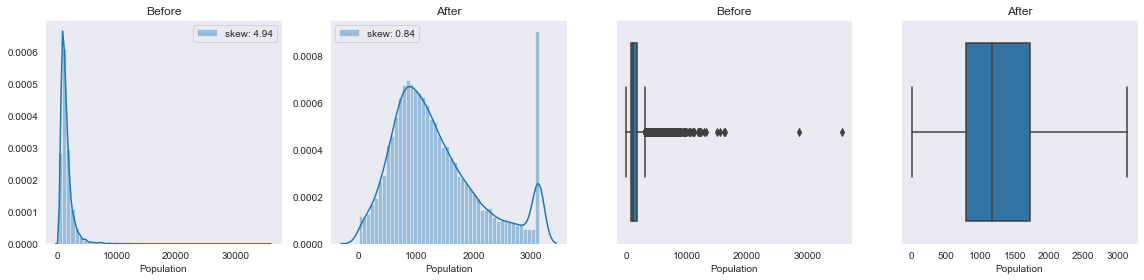

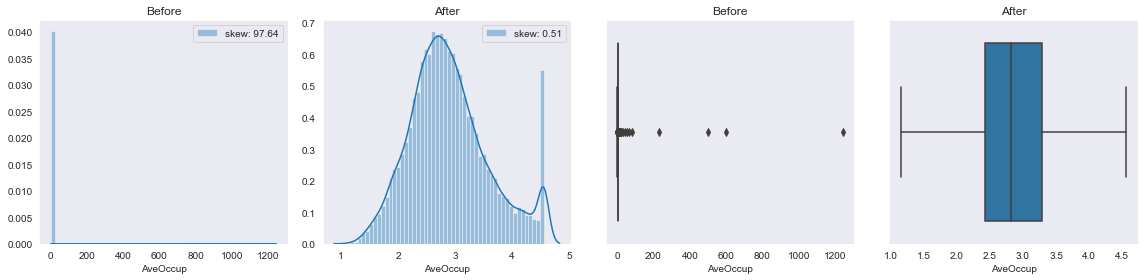

In [22]:
for col in X.columns:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(141)
    sns.distplot(housing[col], label="skew: "+str(np.round(housing[col].skew(),2)))
    plt.title("Before")
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: "+str(np.round(df_cap[col].skew(),2)))
    plt.title("After")
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(housing[col])
    plt.title("Before")
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title("After")
    plt.tight_layout()
    plt.show()

### IQR Trimming

In [28]:
df_trim = housing.copy()

In [29]:
def iqr_trimming(df, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s=df[col]
        
        indexes = s[(s > upper_whisker) | (s < lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
        
    return drop_outliers

In [30]:
dropped = np.unique(iqr_trimming(df_trim, X.columns, 1.5))
dropped

array([0.0000e+00, 1.0000e+00, 4.1000e+01, ..., 2.0621e+04, 2.0629e+04,
       2.0636e+04])

In [31]:
df_trim.drop(dropped, inplace=True)

In [32]:
df_trim.shape

(16842, 7)

In [34]:
housing.shape

(20640, 7)

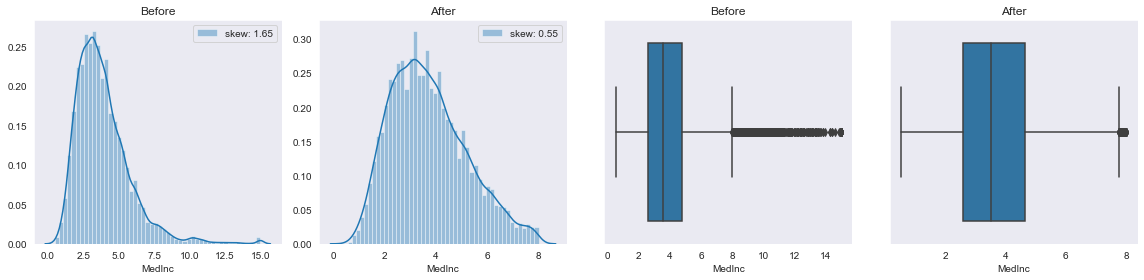

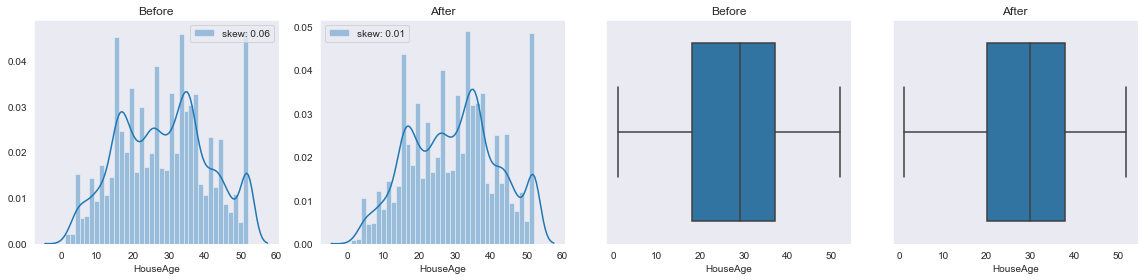

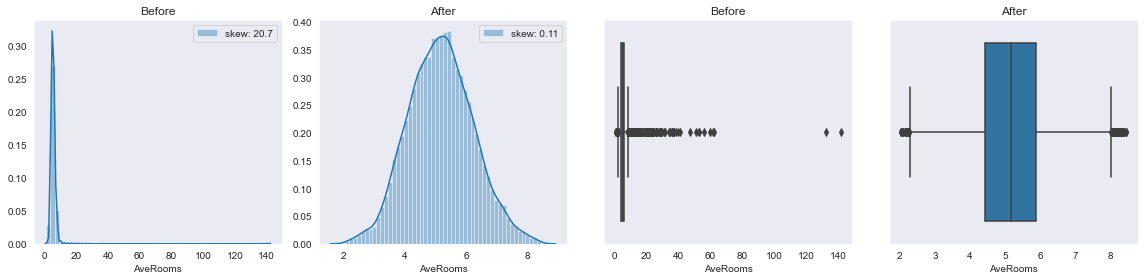

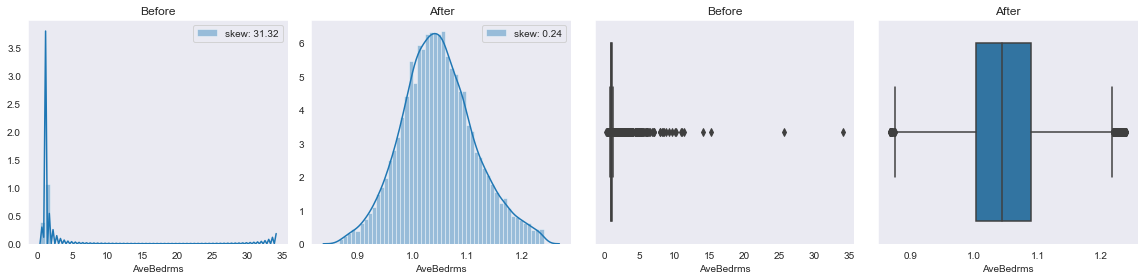

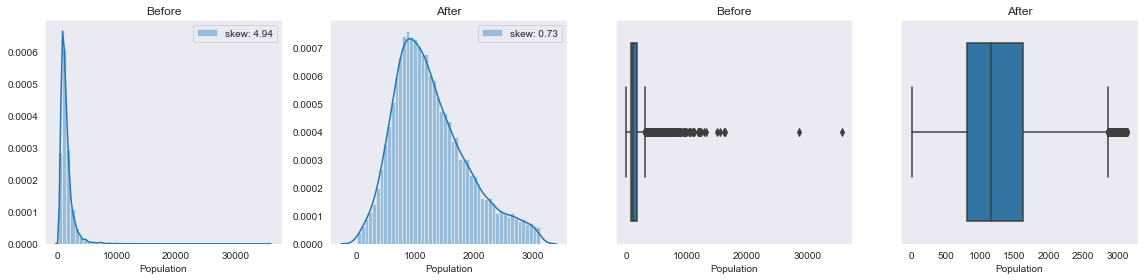

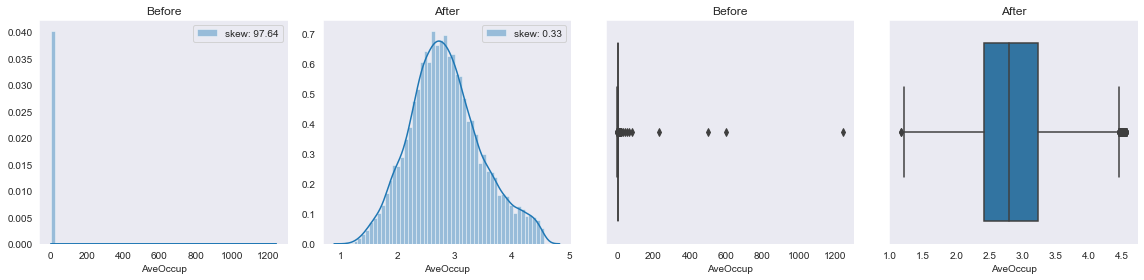

In [35]:
for col in X.columns:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(141)
    sns.distplot(housing[col], label="skew: "+str(np.round(housing[col].skew(),2)))
    plt.title("Before")
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_trim[col], label="skew: "+str(np.round(df_trim[col].skew(),2)))
    plt.title("After")
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(housing[col])
    plt.title("Before")
    
    plt.subplot(144)
    sns.boxplot(df_trim[col])
    plt.title("After")
    plt.tight_layout()
    plt.show()